In [ ]:
%load_ext autoreload
%autoreload 2

import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from tshelpers.plot import plot_missing

sns.set_theme(style="ticks", palette="mako")
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
master_df = pd.read_csv("data/2016_2021_master_df.csv")
master_df["DATE_PST"] = pd.to_datetime(master_df["DATE_PST"])
master_df.set_index("DATE_PST", inplace=True)
display(master_df.head())
print(master_df.shape)

,Vancouver_Clark_Drive_PM25,Vancouver_International_Airport_#2_PM25,North_Vancouver_Mahon_Park_PM25,North_Vancouver_Second_Narrows_PM25
DATE_PST,,,,
2016-01-01 01:00:00,30.557,22.71692,22.798870,NaN
2016-01-01 02:00:00,34.661,21.95020,22.909090,6.341111
2016-01-01 03:00:00,35.419,21.25953,19.857730,5.340278
2016-01-01 04:00:00,24.335,19.93333,13.575990,3.907917
2016-01-01 05:00:00,29.336,19.07922,7.079589,7.235889


(57014, 4)


(9503, 4)


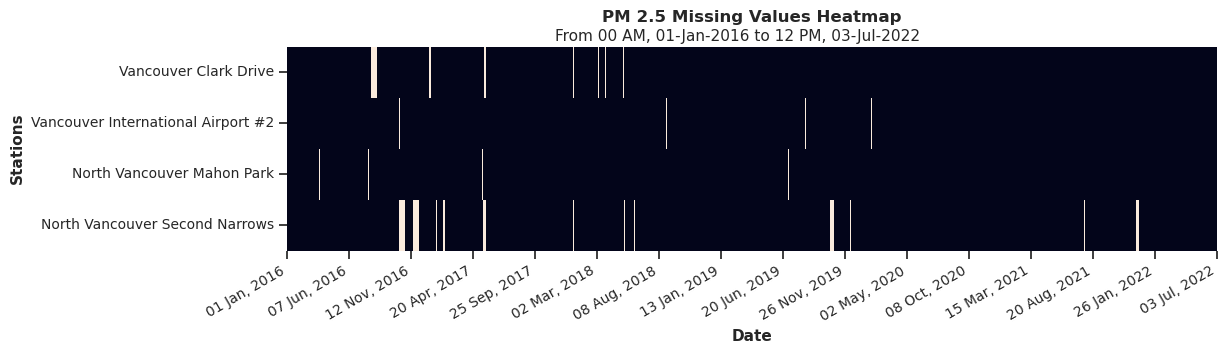

In [4]:
# Resampled data to 6h aggregate
master_df_6h = master_df.resample('6H').mean()
print(master_df_6h.shape)
plot_missing(master_df_6h)

In [5]:
# Stations
master_df_6h.columns

Index(['Vancouver_Clark_Drive_PM25', 'Vancouver_International_Airport_#2_PM25',
       'North_Vancouver_Mahon_Park_PM25',
       'North_Vancouver_Second_Narrows_PM25'],
      dtype='object')

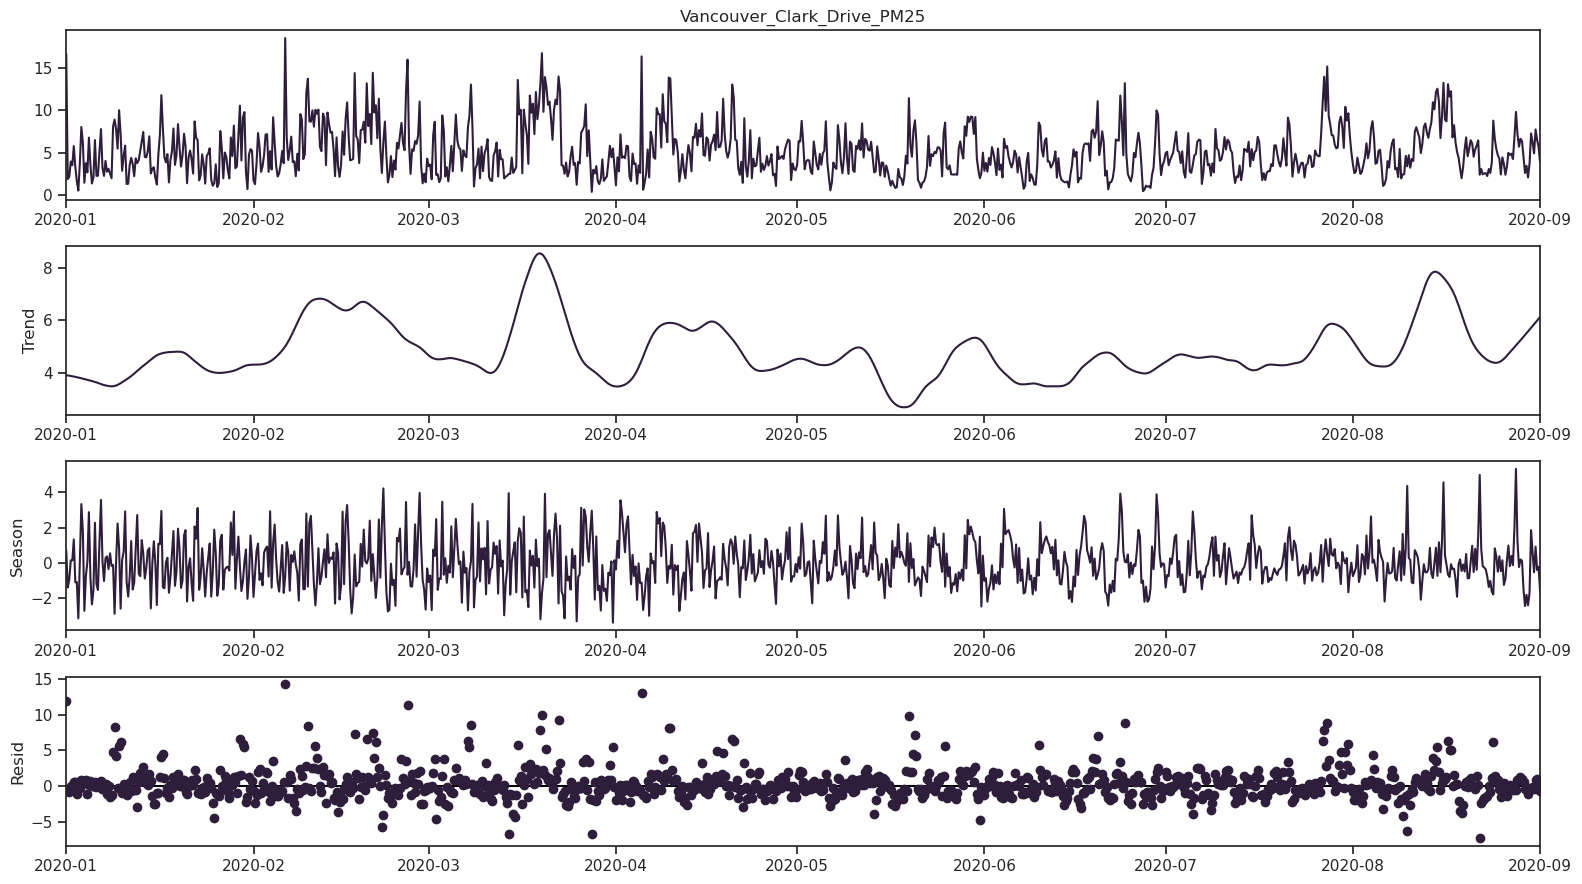

In [7]:
# Season-Trend decomposition using LOESS
subset = master_df_6h['Vancouver_Clark_Drive_PM25']
clark_decomposed = STL(
    subset[datetime(2020, 1, 1): datetime(2020, 9, 1)],
    seasonal=7,
    robust=True
).fit()

fig = clark_decomposed.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

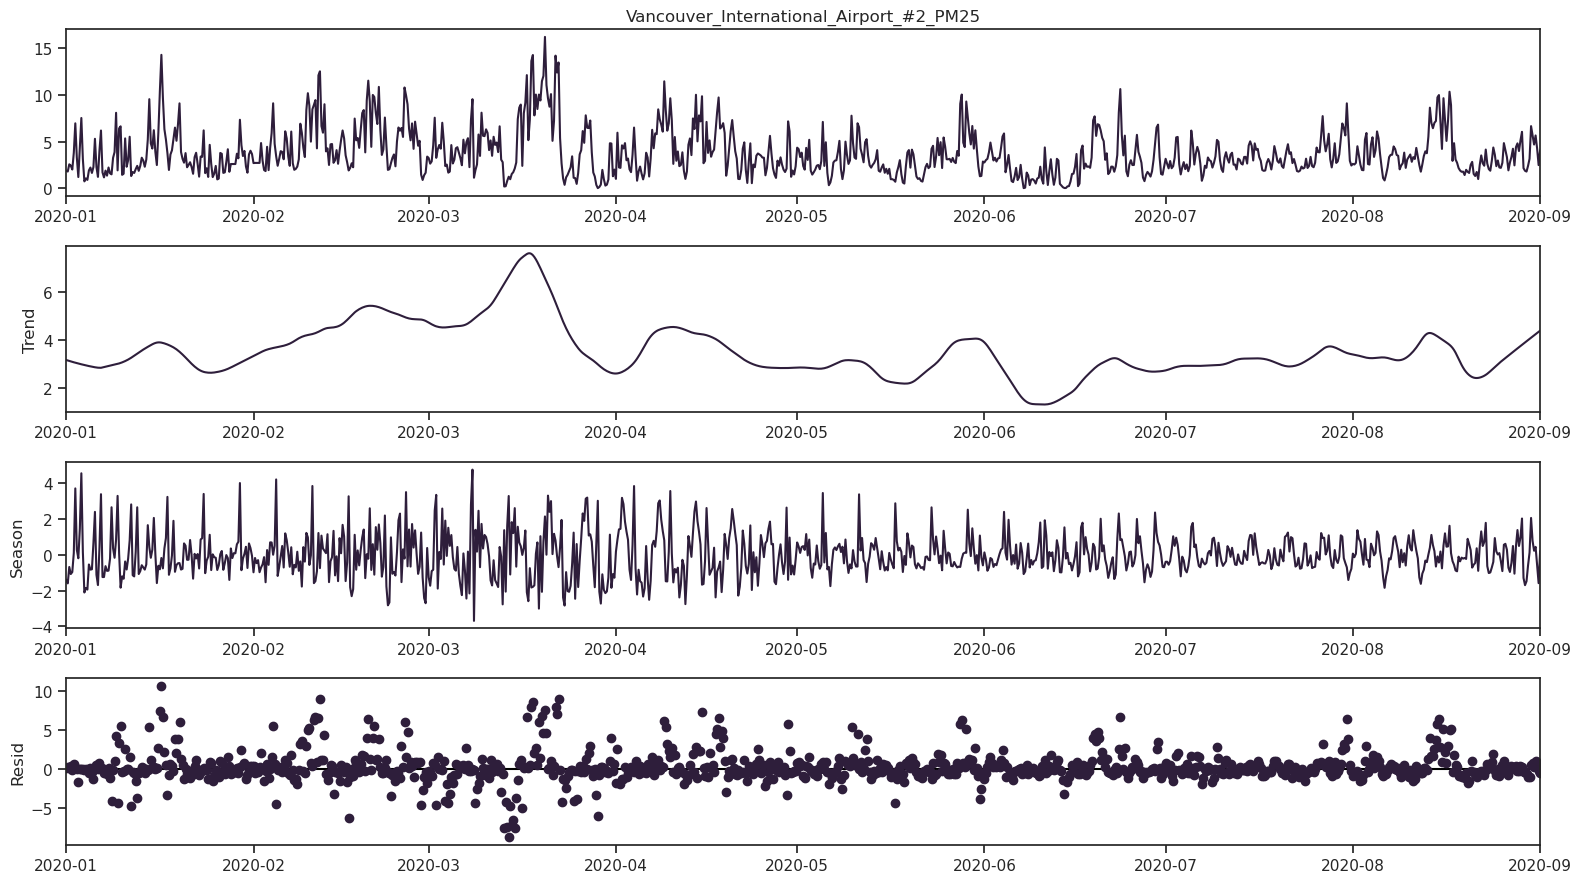

In [8]:
subset = master_df_6h['Vancouver_International_Airport_#2_PM25']
# subset[datetime(2018, 9, 1): datetime(2019, 1, 1)]
clark_decomposed = STL(
    subset[datetime(2020, 1, 1): datetime(2020, 9, 1)].ffill(),
    seasonal=7,
    robust=True
).fit()

fig = clark_decomposed.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()